In [1]:
%matplotlib inline
%time from hikyuu.interactive.interactive import *
#use_draw_engine('echarts') #use_draw_engine('matplotlib')  #默认为'matplotlib'绘图

std::cout are redirected to python::stdout
std::cerr are redirected to python::stderr
[2019-03-27 21:33:38.882] [info] Loading market information...
[2019-03-27 21:33:38.886] [info] Loading stock type information...
[2019-03-27 21:33:38.887] [info] Loading stock information...
[2019-03-27 21:33:43.917] [info] Loading KData...
[2019-03-27 21:33:43.928] [info] Preloading all day kdata to buffer!
[2019-03-27 21:33:53.843] [info] 9.92529s Loaded Data.
Wall time: 17.6 s


1 简单示例
========

查询并绘制上证指数最后100个交易日的K线数据

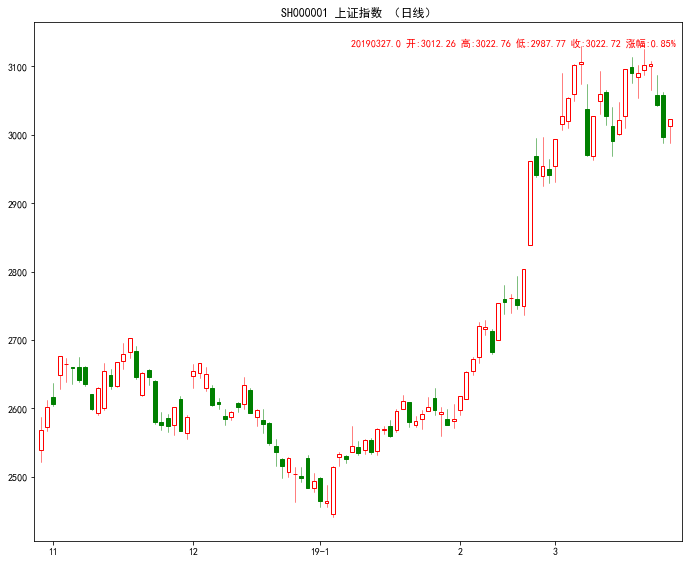

In [2]:
s = sm['sh000001']
k = s.getKData(Query(-100))  
k.plot()

2 查看与遍历K线数据
==========

K线数据可以象list一样遍历和查看具体值

In [3]:
s = sm['sh000001']
k = s.getKData(Query(-100))  
print(k)

KData{
  size : 100
  stock: Stock(SH, 000001, 上证指数, 指数, 1, 1990-12-19 0:0:0, +infinity),
  query: KQuery(-100, 9223372036854775807, INDEX, DAY, NO_RECOVER)
 }


In [4]:
#查看最后5个交易日的K线值
k[-5:]

[<KRecord(Datetime(201903210000), 3094.1200, 3125.0200, 3086.8500, 3101.4600, 40393981.9000, 4142511.0000)>,
 <KRecord(Datetime(201903220000), 3100.7300, 3107.2800, 3064.8800, 3104.1500, 35667833.6000, 3648483.0000)>,
 <KRecord(Datetime(201903250000), 3058.8000, 3087.0000, 3041.9500, 3043.0300, 37537565.9000, 3802787.0000)>,
 <KRecord(Datetime(201903260000), 3057.5600, 3062.6900, 2988.4900, 2997.1000, 34144482.0000, 3534980.0000)>,
 <KRecord(Datetime(201903270000), 3012.2600, 3022.7600, 2987.7700, 3022.7200, 29507597.1000, 2913903.0000)>]

In [5]:
#遍历查询最大收盘价
max_close = 0
for v in k:
    if v.closePrice > max_close:
        max_close = v.closePrice
print(max_close)

3106.42


K线数据（KData）其实是有KRecord组成的数组，KRecord的属性如下：

In [6]:
print("日期 - ", k[0].datetime)
print("开盘价 - ", k[0].openPrice)
print("最高价 - ", k[0].highPrice)
print("最低价 - ", k[0].lowPrice)
print("收盘价 - ", k[0].closePrice)
print("成交金额 - ", k[0].transAmount)
print("成交量 - ", k[0].transCount)

日期 -  2018-10-30 0:0:0
开盘价 -  2538.57
最高价 -  2586.92
最低价 -  2521.78
收盘价 -  2568.05
成交金额 -  15238592.9
成交量 -  1666823.0


3 Query详解
========

获取Stock的K线数据，需要指定查询条件，可按索引和日期两种方式查询。

构建按索引方式查询条件：Query(start=0, end=None , kType=Query.DAY, recoverType=Query.NO_RECOVER)

构建按日期方式查询条件：QueryByDate(start=None, end=None, kType=Query.DAY, recoverType=Query.NO_RECOVER)

其中，索引遵循Python的惯用方式，即以0位起始，以[start, end)的方式查询，支持负数表示倒叙; 按日期查询同样遵循[start, end)惯例。

kType: 为K线数据类型（日线、分钟线、周线等）:

    - Query.DAY      日线
    - Query.WEEK     周线
    - Query.MONTH    月线
    - Query.QUARTER  季线
    - Query.HALFYEAR 半年线
    - Query.YEAR     年线
    - Query.MIN      1分钟线
    - Query.MIN5     5分钟线
    - Query.MIN15    15分钟线
    - Query.MIN30    30分钟线
    - Query.MIN60    60分钟线
    
recoverType：为复权类型（不复权、前向复权、后向复权、等比前向复权、等比后向复权），仅支持日线复权：

    - Query.NO_RECOVER     不复权
    - Query.FORWARD        前向复权
    - Query.BACKWARD       后向复权
    - Query.EQUAL_FORWARD  等比前向复权
    - Query.EQUAL_BACKWARD 等比后向复权

3.1 按索引方式查询K线数据
-------------------------

In [7]:
#查询股票前100个交易日的K线数据
k = s.getKData(Query(0, 100))

#查询股票最后100个交易日K线数据
k = s.getKData(Query(-100))

#查询股票第199个交易日到第209个交易日的K线数据
k = s.getKData(Query(200, 210))

#查询股票倒数第100个交易日至倒数第10个交易日的K线数据
k = s.getKData(Query(-100, -10))

3.2 按日期方式查询K线数据
--------------------------

按日期查询同样遵循 [start, end) 惯例。

日期类型为Hikyuu库中定义的 Datetime，其记录的是“年月日时分”。可使用Python的datetime类型、日期字符串或数字表示法进行构建:

- Datetime(datetime.date(2017,1,1))  - 从Python的datetime构建
- Datetime('2017-1-1 9:35') - 通过日期字符串构建
- Datetime(201701010935) - 通过数字进行构建，数字格式须如“yyyymmddhhmm”（4位年份2位月份2位小时数2位分钟数）

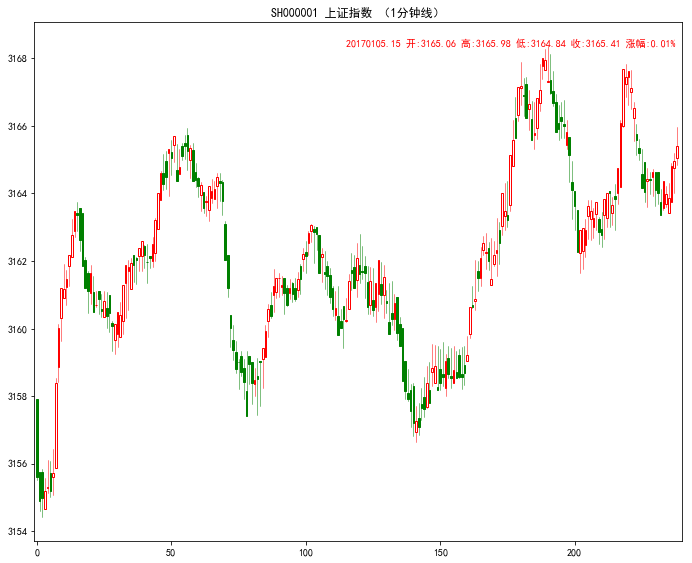

In [8]:
#查询2017年1月1日至今的日线数据
k = s.getKData(QueryByDate(Datetime(201701010000)))

#查询2017年1月1日至3月31日日线数据
k = s.getKData(QueryByDate(Datetime(201701010000), Datetime(201704010000)))

#查询2017年1月5日1分钟线数据
k = s.getKData(QueryByDate(Datetime(201701050000), Datetime(201701060000), kType=Query.MIN))
k.plot()

3.3 查询复权日线
----------------

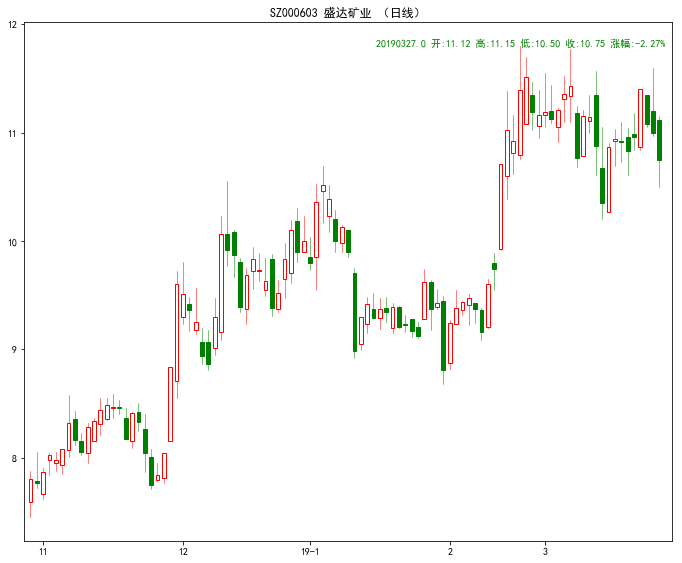

In [9]:
s = sm['sz000603']

#查询股票最后100个交易日K线数据，不复权
k = s.getKData(Query(-100))
k.plot()

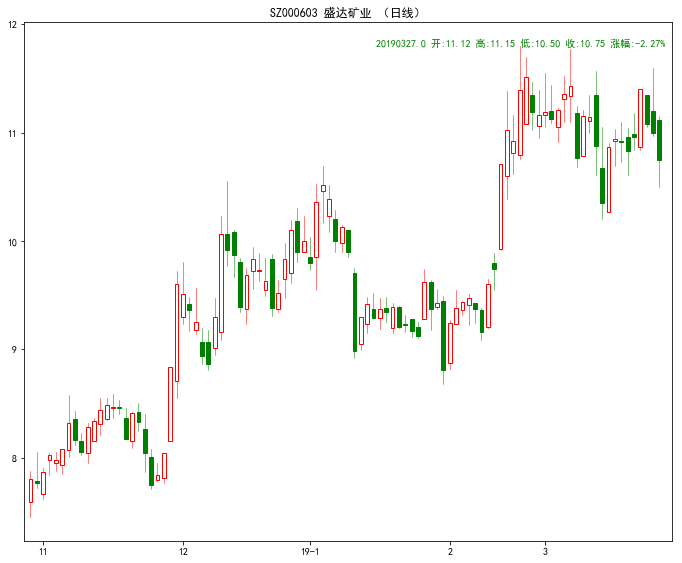

In [10]:
#查询股票最后100个交易日K线数据，后向复权
k = s.getKData(Query(-100, recoverType=Query.BACKWARD))
k.plot()